# Unlocking Greatness: Predicting future NBA Hall of Famers

In the world of professional basketball, only a select few athletes achieve the highest honor – induction into the NBA Hall of Fame. As fans, analysts, and enthusiasts, we are captivated by the incredible talent and awe-inspiring performances of the current generation of players. However, the burning question remains: Which of these current or latest players will etch their names among the legends in the hallowed halls of basketball greatness?

In this project, we embark on a thrilling journey of prediction and analysis, seeking to uncover the potential future NBA Hall of Famers among the present-day stars. Through a comprehensive collection of data on former players' stats we explore the intricate patterns and distinguishing factors that separate the Hall of Famers from the rest.

In this notebook, we will be using three main sources of NBA player data. Two are datasets are gathered from Kaggle.com, and one source will be a data table scraped from basketball-reference.com. We import and scrape these datasets, then perform data cleaning/parsing techniques on them. These datasets are stored in the Pandas DataFrame format, which allows us to perform a variety of tasks on them, incudling analyzing and visualizing data. We then end by using a few Machine Learning models that will predict if an active NBA player will be a future Hall of Famer based on the averages so far in their career.

In [63]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import requests
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline

## Data Collection

In [22]:
nba22_df = pd.read_csv('2022-2023 NBA Player Stats.csv', sep=';', encoding='Windows-1252')

In [23]:
nba22_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [24]:
nba22_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

In [25]:
nba22_df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,...,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,265.976436,26.025037,43.338733,20.069219,19.463476,3.249190,6.920913,0.462190,0.996465,2.782916,...,0.711576,0.842268,2.620177,3.461414,2.011635,0.601767,0.370398,1.067305,1.660677,8.858763
std,154.956296,4.325709,24.727306,25.766359,9.416316,2.362645,4.795709,0.116682,0.862161,2.209427,...,0.224774,0.731867,1.715999,2.281317,1.891472,0.392063,0.367514,0.799478,0.770492,6.631226
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,23.000000,22.000000,0.000000,12.150000,1.500000,3.400000,0.415000,0.300000,1.000000,...,0.667000,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,264.000000,25.000000,45.000000,6.000000,18.800000,2.600000,5.700000,0.454000,0.800000,2.400000,...,0.760000,0.700000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.600000,6.900000
75%,399.500000,29.000000,65.500000,36.500000,27.550000,4.200000,9.200000,0.505000,1.500000,4.150000,...,0.841000,1.100000,3.400000,4.500000,2.700000,0.800000,0.500000,1.400000,2.200000,11.550000
max,539.000000,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,...,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000


## Data Cleaning

First we need to clean our dataset of current NBA players by removing any duplicate entries


In [46]:
#These are the players who have multiple rows, meaning they played for multiple teams in the 2022-23 season
nba22_df[nba22_df['Player'].duplicated() == True]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
17,15,Ryan Arcidiacono,PG,28,NYK,11,0,2.4,0.1,0.5,...,0.000,0.0,0.4,0.4,0.2,0.2,0.0,0.1,0.3,0.3
18,15,Ryan Arcidiacono,PG,28,POR,9,4,16.2,0.9,3.6,...,0.000,0.0,1.2,1.2,2.3,0.3,0.0,0.7,1.6,2.6
26,22,Mo Bamba,C,24,ORL,40,6,17.0,2.7,5.4,...,0.686,1.2,3.4,4.6,1.1,0.3,1.0,0.6,2.2,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,498,T.J. Warren,SF,29,PHO,16,0,12.3,1.9,4.4,...,0.500,0.8,2.3,3.1,0.7,0.4,0.3,0.2,1.3,4.2
643,507,Russell Westbrook,PG,34,LAL,52,3,28.7,5.8,14.0,...,0.655,1.1,5.0,6.2,7.5,1.0,0.4,3.5,2.3,15.9
644,507,Russell Westbrook,PG,34,LAC,21,21,30.2,6.1,12.5,...,0.658,1.4,3.4,4.9,7.6,1.1,0.5,3.4,2.0,15.8
668,530,James Wiseman,C,21,GSW,21,0,12.5,2.8,4.5,...,0.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9


In [26]:
players = nba22_df.groupby('Player')

In [61]:
multiple_teams = []

#The player variable represents the current player's name, 
#while the player_df variable represents the DataFrame containing all the rows of data associated with that player.
for player, player_df in players:
    if len(player_df.index) > 1:
        multiple_teams.append(player)
        
# if a player played for multiple teams, we only want to keep their total stats
for i, row in nba22_df.iterrows():
    if row.Player in multiple_teams and row.Tm != 'TOT':
        nba22_df = nba22_df.drop(i)

nba22_df[nba22_df['Player'].duplicated() == True]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


Since there are 0 rows, it shows that every player who played for multiple teams has only one row

In [109]:
#getting data of the HOF inductees using web scrapping 

URL = 'https://www.basketball-reference.com/awards/hof.html'

request = requests.get(URL)
bs = BeautifulSoup(request.content, 'html.parser')

table = bs.find('table').prettify()
hof_df = pd.read_html(table, flavor = 'bs4')[0]

hof_df.head()

Unnamed: 0_level_0                      Unnamed: 1_level_0  \
                Year                                    Name   
0               2023               1976 Women's Olympic Team   
1               2023                               Gene Bess   
2               2023                  Gary Blair  CBB  coach   
3               2023             Pau Gasol  Player  /  Int'l   
4               2023  Becky Hammon  Coach  /  WNBA  /  Int'l   

  Unnamed: 2_level_0 Unnamed: 3_level_0 Per Game                     Shooting  \
            Category                  G      PTS  TRB  AST  STL  BLK      FG%   
0               Team                NaN      NaN  NaN  NaN  NaN  NaN      NaN   
1              Coach                NaN      NaN  NaN  NaN  NaN  NaN      NaN   
2              Coach                NaN      NaN  NaN  NaN  NaN  NaN      NaN   
3             Player               1226     17.0  9.2  3.2  0.5  1.6     .507   
4             Player                NaN      NaN  NaN  NaN  NaN  NaN      NaN   

              Advanced       Unnamed: 14_level_0 Coaching                 
    3P%   FT%       WS WS/48 Unnamed: 14_level_1        G    W    L W/L%  
0   NaN   NaN      NaN   NaN                 NaN      NaN  NaN  NaN  NaN  
1   NaN   NaN      NaN   NaN                 NaN      NaN  NaN  NaN  NaN  
2   NaN   NaN      NaN   NaN                 NaN      NaN  NaN  NaN  NaN  
3  .368  .753    144.1  .169                 NaN      NaN  NaN  NaN  NaN  
4   NaN   NaN      NaN   NaN                 NaN      NaN  NaN  NaN  NaN

In [110]:
#since the DataFrame has multiple levels, we can drop the level we don't need
hof_df.columns = hof_df.columns.droplevel()

In [111]:
hof_df.head(10)

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Unnamed: 14_level_1,G,W,L,W/L%
0,2023,1976 Women's Olympic Team,Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Gene Bess,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Gary Blair CBB coach,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Pau Gasol Player / Int'l,Player,1226,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169,NaN,NaN,NaN,NaN,NaN
4,2023,Becky Hammon Coach / WNBA / Int'l,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023,David Hixon,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023,Gene Keady Coach / CBB coach,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023,Dirk Nowitzki Player / Int'l,Player,1522,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193,NaN,NaN,NaN,NaN,NaN
8,2023,Tony Parker Player / Int'l,Player,1254,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140,NaN,NaN,NaN,NaN,NaN
9,2023,Gregg Popovich Coach / Exec / CBB player,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127,1366,761,.642


In [112]:
#this data frame has a lot of missing values and data about all the HOF inductees, we only need data about the players

for i, row_df in hof_df.iterrows():
    if row_df.Category != 'Player':
        hof_df = hof_df.drop(i)

hof_df.head()

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Unnamed: 14_level_1,G,W,L,W/L%
3,2023,Pau Gasol Player / Int'l,Player,1226,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169,NaN,NaN,NaN,NaN,NaN
4,2023,Becky Hammon Coach / WNBA / Int'l,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023,Dirk Nowitzki Player / Int'l,Player,1522,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193,NaN,NaN,NaN,NaN,NaN
8,2023,Tony Parker Player / Int'l,Player,1254,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140,NaN,NaN,NaN,NaN,NaN
11,2023,Dwyane Wade Player / Int'l / CBB player,Player,1054,22.0,4.7,5.4,1.5,0.8,.480,.293,.765,120.7,.162,NaN,NaN,NaN,NaN,NaN


In [113]:
#now that we've removed people who are not players, we also need to remove WNBA, since we are only looking at NBA

for i, row_df in hof_df.iterrows():
    if 'WNBA' in row_df.Name:
        hof_df = hof_df.drop(i)

hof_df.head(10)

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Unnamed: 14_level_1,G,W,L,W/L%
3,2023,Pau Gasol Player / Int'l,Player,1226,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169,NaN,NaN,NaN,NaN,NaN
7,2023,Dirk Nowitzki Player / Int'l,Player,1522,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193,NaN,NaN,NaN,NaN,NaN
8,2023,Tony Parker Player / Int'l,Player,1254,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140,NaN,NaN,NaN,NaN,NaN
11,2023,Dwyane Wade Player / Int'l / CBB player,Player,1054,22.0,4.7,5.4,1.5,0.8,.480,.293,.765,120.7,.162,NaN,NaN,NaN,NaN,NaN
14,2022,Sonny Boswell,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2022,Manu Ginobili Player / Int'l,Player,1057,13.3,3.5,3.8,1.3,0.3,.447,.369,.827,106.4,.190,NaN,NaN,NaN,NaN,NaN
19,2022,Tim Hardaway Player / Coach / CBB player,Player,867,17.7,3.3,8.2,1.6,0.1,.431,.355,.782,85.0,.133,NaN,NaN,NaN,NaN,NaN
21,2022,Lou Hudson Player / CBB player,Player,890,20.2,4.4,2.7,1.4,0.3,.489,NaN,.797,81.0,.131,NaN,NaN,NaN,NaN,NaN
23,2022,Inman Jackson,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2022,Radivoj Korac Int'l,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#some players have all their stats missing, so we need to drop them as well

hof_df = hof_df.dropna(subset=['PTS'])
hof_df.head(10)

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Unnamed: 14_level_1,G,W,L,W/L%
3,2023,Pau Gasol Player / Int'l,Player,1226,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169,NaN,NaN,NaN,NaN,NaN
7,2023,Dirk Nowitzki Player / Int'l,Player,1522,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193,NaN,NaN,NaN,NaN,NaN
8,2023,Tony Parker Player / Int'l,Player,1254,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140,NaN,NaN,NaN,NaN,NaN
11,2023,Dwyane Wade Player / Int'l / CBB player,Player,1054,22.0,4.7,5.4,1.5,0.8,.480,.293,.765,120.7,.162,NaN,NaN,NaN,NaN,NaN
18,2022,Manu Ginobili Player / Int'l,Player,1057,13.3,3.5,3.8,1.3,0.3,.447,.369,.827,106.4,.190,NaN,NaN,NaN,NaN,NaN
19,2022,Tim Hardaway Player / Coach / CBB player,Player,867,17.7,3.3,8.2,1.6,0.1,.431,.355,.782,85.0,.133,NaN,NaN,NaN,NaN,NaN
21,2022,Lou Hudson Player / CBB player,Player,890,20.2,4.4,2.7,1.4,0.3,.489,NaN,.797,81.0,.131,NaN,NaN,NaN,NaN,NaN
34,2021,Chris Bosh Player / CBB player,Player,893,19.2,8.5,2.0,0.8,1.0,.494,.335,.799,106.0,.159,NaN,NaN,NaN,NaN,NaN
35,2021,Bob Dandridge Player,Player,839,18.5,6.8,3.4,1.3,0.6,.484,NaN,.780,80.3,.131,NaN,NaN,NaN,NaN,NaN
41,2021,Toni Kukoc Player / Int'l,Player,846,11.6,4.2,3.7,1.0,0.3,.447,.335,.729,59.6,.129,NaN,NaN,NaN,NaN,NaN


In [115]:
#drop columns that has a lot of missing data
hof_df = hof_df.drop(columns=['Unnamed: 14_level_1', 'G', 'W', 'L', 'W/L%'], axis=1)
hof_df.head(10)

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
3,2023,Pau Gasol Player / Int'l,Player,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169
7,2023,Dirk Nowitzki Player / Int'l,Player,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193
8,2023,Tony Parker Player / Int'l,Player,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140
11,2023,Dwyane Wade Player / Int'l / CBB player,Player,22.0,4.7,5.4,1.5,0.8,.480,.293,.765,120.7,.162
18,2022,Manu Ginobili Player / Int'l,Player,13.3,3.5,3.8,1.3,0.3,.447,.369,.827,106.4,.190
19,2022,Tim Hardaway Player / Coach / CBB player,Player,17.7,3.3,8.2,1.6,0.1,.431,.355,.782,85.0,.133
21,2022,Lou Hudson Player / CBB player,Player,20.2,4.4,2.7,1.4,0.3,.489,NaN,.797,81.0,.131
34,2021,Chris Bosh Player / CBB player,Player,19.2,8.5,2.0,0.8,1.0,.494,.335,.799,106.0,.159
35,2021,Bob Dandridge Player,Player,18.5,6.8,3.4,1.3,0.6,.484,NaN,.780,80.3,.131
41,2021,Toni Kukoc Player / Int'l,Player,11.6,4.2,3.7,1.0,0.3,.447,.335,.729,59.6,.129


In [94]:
hof_df.head()

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
3,2023,Pau Gasol Player / Int'l,Player,17.0,9.2,3.2,0.5,1.6,.507,.368,.753,144.1,.169
7,2023,Dirk Nowitzki Player / Int'l,Player,20.7,7.5,2.4,0.8,0.8,.471,.380,.879,206.3,.193
8,2023,Tony Parker Player / Int'l,Player,15.5,2.7,5.6,0.8,0.1,.491,.324,.751,111.3,.140
11,2023,Dwyane Wade Player / Int'l / CBB player,Player,22.0,4.7,5.4,1.5,0.8,.480,.293,.765,120.7,.162
18,2022,Manu Ginobili Player / Int'l,Player,13.3,3.5,3.8,1.3,0.3,.447,.369,.827,106.4,.190


In [118]:
#fixing the name coloumn to just havr first and last name
def correct_name(name):
    name_list = name.split()
    new_name = ' '.join(name_list[:2])
    return new_name

In [119]:
hof_df['Name'] = hof_df['Name'].apply(lambda n: correct_name(n))

In [127]:
hof_df.sort_values(by='Year', inplace=True)
hof_df.head()

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
579,1959,George Mikan,Player,23.1,13.4,2.8,NaN,NaN,.404,NaN,.782,108.7,.249
562,1960,Ed Macauley,Player,17.5,7.5,3.2,NaN,NaN,.436,NaN,.761,100.4,.196
545,1961,Andy Phillip,Player,9.1,4.4,5.4,NaN,NaN,.368,NaN,.695,60.5,.100
490,1970,Bob Davies,Player,14.3,2.9,4.9,NaN,NaN,.378,NaN,.759,49.7,.148
484,1971,Bob Cousy,Player,18.4,5.2,7.5,NaN,NaN,.375,NaN,.803,91.1,.139


## Exploratory Data Analysis

In [131]:
#cast from strings to floating point
hof_df['Year'] = pd.to_numeric(pd.Series(hof_df['Year'])) 
hof_df['PTS'] = pd.to_numeric(pd.Series(hof_df['PTS'])) 
hof_df['TRB'] = pd.to_numeric(pd.Series(hof_df['TRB'])) 
hof_df['AST'] = pd.to_numeric(pd.Series(hof_df['AST'])) 
hof_df['BLK'] = pd.to_numeric(pd.Series(hof_df['BLK'])) 
hof_df['STL'] = pd.to_numeric(pd.Series(hof_df['STL'])) 

Text(0.5, 1.0, 'HOF PTS vs Year')

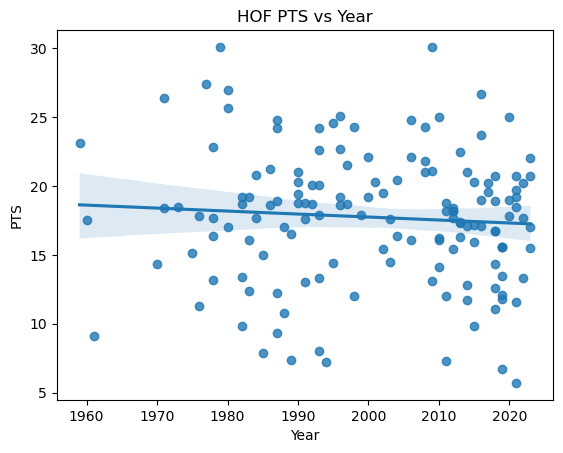

In [138]:
sns.regplot(data = hof_df, x = 'Year', y = 'PTS')
plt.title("HOF PTS vs Year")

This graph shows that average Points per game of HOF players over the years has not changed much. In fact, it is slightly going down, this could be due players becoming more skillful defensively as well.

## Comparisons between Avg. Hall of Famer and Avg. NBA Player

In [139]:
#Average Points per Game
nba_avg_points = np.mean(nba22_df['PTS'])
hof_avg_points = np.mean(hof_df['PTS'])

Text(0.5, 1.0, 'Average Points Per Game')

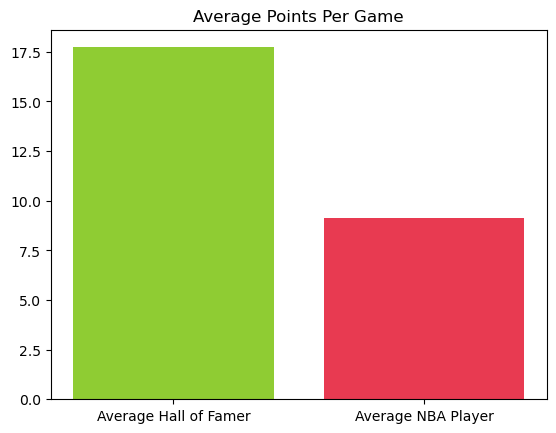

In [149]:
colors = ['#8fcc33','#e83a51']
plt.bar(["Average Hall of Famer","Average NBA Player"], [hof_avg_points, nba_avg_points], color = colors)
plt.title('Average Points Per Game')

In [151]:
#Average Rebounds per game
nba_avg_trb = np.mean(nba22_df['TRB'])
hof_avg_trb = np.mean(hof_df['TRB'])

Text(0.5, 1.0, 'Average Rebound Per Game')

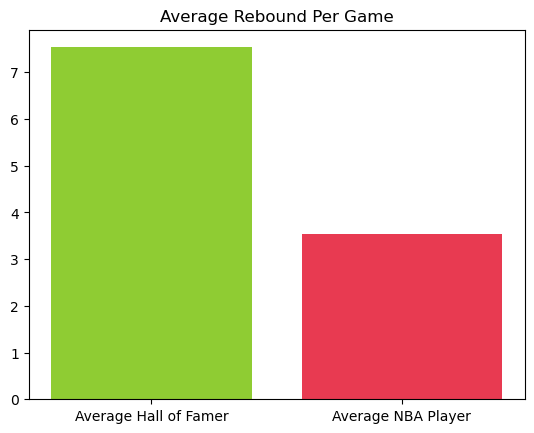

In [153]:
plt.bar(['Average Hall of Famer', 'Average NBA Player'], [hof_avg_trb, nba_avg_trb], color = colors)
plt.title('Average Rebound Per Game')

In [154]:
#Average Assists per game
nba_avg_ast = np.mean(nba22_df['AST'])
hof_avg_ast = np.mean(hof_df['AST'])

Text(0.5, 1.0, 'Average Assists Per Game')

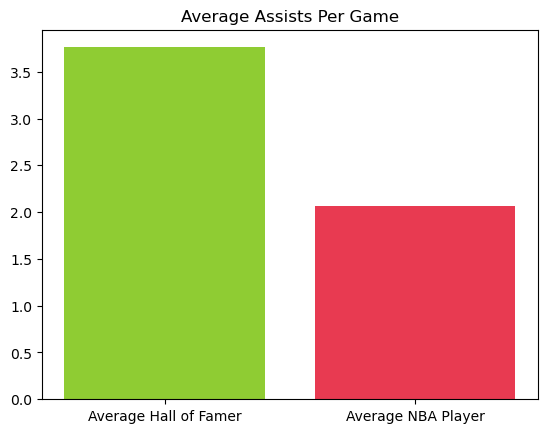

In [156]:
plt.bar(['Average Hall of Famer', 'Average NBA Player'], [hof_avg_ast, nba_avg_ast], color = colors)
plt.title('Average Assists Per Game')

In [157]:
#Average blocks per game
nba_avg_blk = np.mean(nba22_df['BLK'])
hof_avg_blk = np.mean(hof_df['BLK'])

Text(0.5, 1.0, 'Average Blocks Per Game')

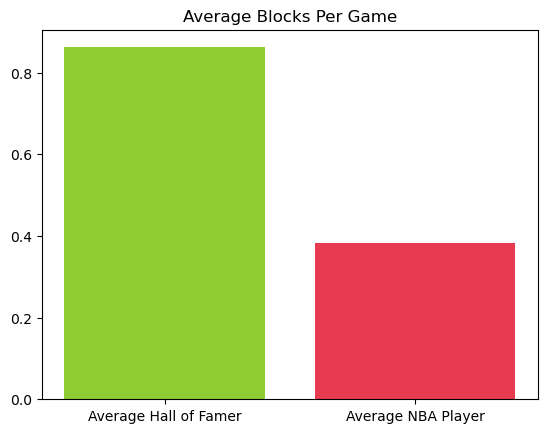

In [159]:
plt.bar(['Average Hall of Famer', 'Average NBA Player'], [hof_avg_blk, nba_avg_blk], color = colors)
plt.title('Average Blocks Per Game')

In [370]:
#collecting players data from past seasons
nba_df = pd.read_csv('all_seasons.csv')
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [218]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [219]:
nba_df['player_name'].nunique()

2235

In [220]:
#there are 11145 entries and 2235 players
#so we have to take average of stats for the players that have played multiple seasons

In [221]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
nba_df = nba_df.drop(['age', 'player_height', 'player_weight', 'college',], axis = 1)

In [222]:
nba_df = nba_df.drop(['country','draft_number'],axis=1)
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,draft_year,draft_round,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,1986,2,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,1990,1,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,1979,3,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,1995,1,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,1985,1,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [223]:
players = nba_df.groupby('player_name')
players.head()

,Unnamed: 0,player_name,team_abbreviation,draft_year,draft_round,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,1986,2,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,1990,1,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,1979,3,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,1995,1,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,1985,1,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11139,Max Strus,CHI,Undrafted,Undrafted,2,2.5,0.5,0.0,105.8,0.167,0.000,0.158,0.727,0.000,2019-20
11140,11140,Maxi Kleber,DAL,Undrafted,Undrafted,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,2018,2,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11143,11143,Norvel Pelle,PHI,Undrafted,Undrafted,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [224]:
#we need to average stats for players who have played multiple seasons, since this data is per season
#and we need to do it only once for each player

multiple_seasons = []
debut = {}

for player, p_df in players:
    if len(p_df.index) > 1:
        multiple_seasons.append(player)
    for i, row in p_df.iterrows():
        debut[player] = row.season
        break #this make sures that the loop only adds one season per player, which is their first season


In [225]:
for i, rows in nba_df.iterrows():
    player = rows.player_name
    if player in multiple_seasons:
        if debut[player] == rows.season:
            player_df = nba_df[nba_df['player_name'] == player]
            tot_seasons = player_df.shape[0]
            for s in stats:
                nba_df.at[i, s] = sum(player_df[s])/tot_seasons
        else:
            nba_df = nba_df.drop(i)

In [229]:
nba_df = nba_df.drop(['season'],axis=1)

In [226]:
nba_df.head(10)

,Unnamed: 0,player_name,team_abbreviation,draft_year,draft_round,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,1986,2,42.500000,3.825000,14.150000,2.125000,3.575000,0.151250,0.335250,0.079250,0.445750,0.083500,1996-97
1,1,Dwayne Schintzius,LAC,1990,1,15.500000,1.500000,1.350000,0.400000,-8.450000,0.089500,0.163500,0.175000,0.370000,0.124000,1996-97
2,2,Earl Cureton,TOR,1979,3,9.000000,0.800000,1.000000,0.400000,-2.100000,0.105000,0.102000,0.103000,0.376000,0.148000,1996-97
3,3,Ed O'Bannon,DAL,1995,1,64.000000,3.700000,2.300000,0.600000,-8.700000,0.060000,0.149000,0.167000,0.399000,0.077000,1996-97
4,4,Ed Pinckney,MIA,1985,1,27.000000,2.400000,2.400000,0.200000,-11.200000,0.109000,0.179000,0.127000,0.611000,0.040000,1996-97
5,5,Eddie Johnson,HOU,1981,2,43.333333,6.866667,1.800000,0.833333,-6.866667,0.025000,0.121333,0.238000,0.509000,0.089333,1996-97
6,6,Eddie Jones,LAL,1994,1,68.333333,14.758333,4.091667,2.958333,4.383333,0.026167,0.112833,0.197667,0.546000,0.145083,1996-97
7,7,Elden Campbell,LAL,1990,1,66.777778,10.222222,5.855556,1.155556,2.577778,0.082556,0.200222,0.222000,0.502111,0.088111,1996-97
8,8,Eldridge Recasner,ATL,1992,Undrafted,38.333333,4.033333,1.266667,1.300000,-3.566667,0.023000,0.079167,0.152167,0.494000,0.213167,1996-97
9,9,Elliot Perry,MIL,1991,2,51.500000,5.133333,1.283333,2.416667,-9.383333,0.015667,0.084500,0.191333,0.496833,0.290667,1996-97


In [228]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 11144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2236 non-null   int64  
 1   player_name        2236 non-null   object 
 2   team_abbreviation  2236 non-null   object 
 3   draft_year         2236 non-null   object 
 4   draft_round        2236 non-null   object 
 5   gp                 2236 non-null   float64
 6   pts                2236 non-null   float64
 7   reb                2236 non-null   float64
 8   ast                2236 non-null   float64
 9   net_rating         2236 non-null   float64
 10  oreb_pct           2236 non-null   float64
 11  dreb_pct           2236 non-null   float64
 12  usg_pct            2236 non-null   float64
 13  ts_pct             2236 non-null   float64
 14  ast_pct            2236 non-null   float64
 15  season             2236 non-null   object 
dtypes: float64(10), int64(1

In [230]:
#now we need to check which of these players are in HOF

nba_df['HOF'] = nba_df['player_name'].apply(lambda name: True if name in hof_df['Name'].values else False)

In [231]:
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,draft_year,draft_round,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,HOF
0,0,Dennis Rodman,CHI,1986,2,42.5,3.825,14.15,2.125,3.575,0.15125,0.33525,0.07925,0.44575,0.0835,True
1,1,Dwayne Schintzius,LAC,1990,1,15.5,1.500,1.35,0.400,-8.450,0.08950,0.16350,0.17500,0.37000,0.1240,False
2,2,Earl Cureton,TOR,1979,3,9.0,0.800,1.00,0.400,-2.100,0.10500,0.10200,0.10300,0.37600,0.1480,False
3,3,Ed O'Bannon,DAL,1995,1,64.0,3.700,2.30,0.600,-8.700,0.06000,0.14900,0.16700,0.39900,0.0770,False
4,4,Ed Pinckney,MIA,1985,1,27.0,2.400,2.40,0.200,-11.200,0.10900,0.17900,0.12700,0.61100,0.0400,False


In [232]:
hof_df[hof_df['Name'] == 'Dennis Rodman']

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
172,2011,Dennis Rodman,Player,7.3,13.1,1.8,0.7,0.6,.521,.231,.584,89.8,.150


In [233]:
not_hof_df = nba_df[nba_df['HOF'] == False]
not_hof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1 to 11144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2190 non-null   int64  
 1   player_name        2190 non-null   object 
 2   team_abbreviation  2190 non-null   object 
 3   draft_year         2190 non-null   object 
 4   draft_round        2190 non-null   object 
 5   gp                 2190 non-null   float64
 6   pts                2190 non-null   float64
 7   reb                2190 non-null   float64
 8   ast                2190 non-null   float64
 9   net_rating         2190 non-null   float64
 10  oreb_pct           2190 non-null   float64
 11  dreb_pct           2190 non-null   float64
 12  usg_pct            2190 non-null   float64
 13  ts_pct             2190 non-null   float64
 14  ast_pct            2190 non-null   float64
 15  HOF                2190 non-null   bool   
dtypes: bool(1), float64(10)

In [234]:
hof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 579 to 3
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      147 non-null    int64  
 1   Name      147 non-null    object 
 2   Category  147 non-null    object 
 3   PTS       147 non-null    float64
 4   TRB       146 non-null    float64
 5   AST       147 non-null    float64
 6   STL       106 non-null    float64
 7   BLK       106 non-null    float64
 8   FG%       147 non-null    object 
 9   3P%       53 non-null     object 
 10  FT%       147 non-null    object 
 11  WS        147 non-null    object 
 12  WS/48     146 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 16.1+ KB


In [236]:
not_hof_df.drop(not_hof_df[not_hof_df['draft_year'] == "Undrafted"].index, inplace = True)
not_hof_df.info()
#2190 entries brought down to 1545 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 11135
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1545 non-null   int64  
 1   player_name        1545 non-null   object 
 2   team_abbreviation  1545 non-null   object 
 3   draft_year         1545 non-null   object 
 4   draft_round        1545 non-null   object 
 5   gp                 1545 non-null   float64
 6   pts                1545 non-null   float64
 7   reb                1545 non-null   float64
 8   ast                1545 non-null   float64
 9   net_rating         1545 non-null   float64
 10  oreb_pct           1545 non-null   float64
 11  dreb_pct           1545 non-null   float64
 12  usg_pct            1545 non-null   float64
 13  ts_pct             1545 non-null   float64
 14  ast_pct            1545 non-null   float64
 15  HOF                1545 non-null   bool   
dtypes: bool(1), float64(10)

C:\Users\sanma\AppData\Local\Temp\ipykernel_23244\3605666177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_hof_df.drop(not_hof_df[not_hof_df['draft_year'] == "Undrafted"].index, inplace = True)


In [242]:
not_hof_df[not_hof_df['player_name'] == 'Andre Iguodala']
#oldest active player in the not_hof_df DataFrame is Andre Iguodala and he was drafted in 2004
#so we need to keep everyone who was drafted 2004 or later in a seperate DataFrame
#because these are the players we are going to be predicting to see if they will make it to the Hall of Fame

,Unnamed: 0,player_name,team_abbreviation,draft_year,draft_round,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,HOF
3809,3809,Andre Iguodala,PHI,2004,1,70.0,11.4375,4.98125,4.2,5.19375,0.032625,0.136813,0.161,0.560188,0.189875,False


In [246]:
#renaming few coloumns to maintain consistency among 2 different dataframes
not_hof_df = not_hof_df.rename(columns={'player_name': 'Name', 'pts': "PTS", 'reb':"TRB", "ast": "AST"})

In [247]:
# convert draft year values to numeric
#this will be useful when we have seperate non Hall of Famers
not_hof_df["draft_year"] = pd.to_numeric(pd.Series(not_hof_df["draft_year"])) 

In [248]:
not_hof_df.head()

,Unnamed: 0,Name,team_abbreviation,draft_year,draft_round,gp,PTS,TRB,AST,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,HOF
1,1,Dwayne Schintzius,LAC,1990,1,15.500000,1.500000,1.35,0.400000,-8.450000,0.0895,0.163500,0.175,0.370,0.124000,False
2,2,Earl Cureton,TOR,1979,3,9.000000,0.800000,1.00,0.400000,-2.100000,0.1050,0.102000,0.103,0.376,0.148000,False
3,3,Ed O'Bannon,DAL,1995,1,64.000000,3.700000,2.30,0.600000,-8.700000,0.0600,0.149000,0.167,0.399,0.077000,False
4,4,Ed Pinckney,MIA,1985,1,27.000000,2.400000,2.40,0.200000,-11.200000,0.1090,0.179000,0.127,0.611,0.040000,False
5,5,Eddie Johnson,HOU,1981,2,43.333333,6.866667,1.80,0.833333,-6.866667,0.0250,0.121333,0.238,0.509,0.089333,False


In [249]:
hof_df.head()

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
579,1959,George Mikan,Player,23.1,13.4,2.8,NaN,NaN,.404,NaN,.782,108.7,.249
562,1960,Ed Macauley,Player,17.5,7.5,3.2,NaN,NaN,.436,NaN,.761,100.4,.196
545,1961,Andy Phillip,Player,9.1,4.4,5.4,NaN,NaN,.368,NaN,.695,60.5,.100
490,1970,Bob Davies,Player,14.3,2.9,4.9,NaN,NaN,.378,NaN,.759,49.7,.148
484,1971,Bob Cousy,Player,18.4,5.2,7.5,NaN,NaN,.375,NaN,.803,91.1,.139


In [250]:
#To train and test the model, we are only going to be using PTS (Points), TRB (Rebounds), and AST (Assists)
#Because these are the only 3 categories that are common between these 2 datasets

In [251]:
#creates a HOF column and assigns True value to everyone since they are Hall of Fame inductees
hof_df['HOF'] = True

Preparing data frames for the ML models

In [253]:
latest_players_df = not_hof_df[not_hof_df['draft_year'] >= 2004]

In [255]:
not_hof_df = not_hof_df[not_hof_df["draft_year"] < 2004]

In [258]:
selected_categories = ['Name','PTS','TRB','AST','HOF']

train_df = pd.concat([hof_df[selected_categories], not_hof_df[selected_categories]])

In [286]:
train_df.dropna(inplace=True)

## Machine Learning

In [287]:
X_train = train_df[['PTS','TRB','AST']]
y_train = train_df['HOF']

In [288]:
from sklearn.linear_model import LogisticRegression

### First Model

In [289]:
log_model = LogisticRegression()

In [290]:
#training the model
log_model.fit(X_train, y_train)

LogisticRegression()

In [294]:
test_players_df = latest_players_df[['PTS','TRB','AST']]

In [295]:
predictions = log_model.predict(test_players_df)

In [303]:
test_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 3523 to 11135
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PTS     830 non-null    float64
 1   TRB     830 non-null    float64
 2   AST     830 non-null    float64
dtypes: float64(3)
memory usage: 25.9 KB


In [311]:
latest_players_df['Potential HOF'] = predictions

In [319]:
#List of latest players who can potentially be Hall of Fame Inductee based on their average stats so far in their career
latest_players_df[latest_players_df['Potential HOF'] == True]

,Unnamed: 0,Name,team_abbreviation,draft_year,draft_round,gp,PTS,TRB,AST,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,HOF,Potential HOF
3820,3820,Al Jefferson,BOS,2004,1,65.357143,15.207143,8.157143,1.428571,-3.342857,0.088714,0.246571,0.251500,0.530000,0.093143,False,True
3925,3925,Dwight Howard,ORL,2004,1,69.062500,16.500000,12.087500,1.356250,3.650000,0.119125,0.287750,0.220750,0.606375,0.069250,False,True
4013,4013,Monta Ellis,GSW,2005,2,69.416667,17.658333,3.458333,4.491667,-0.283333,0.019333,0.093500,0.243833,0.519000,0.206917,False,True
4252,4252,Chris Paul,NOK,2005,1,67.466667,18.406667,4.506667,9.440000,7.280000,0.021133,0.125333,0.236133,0.582200,0.431067,False,True
4389,4389,Deron Williams,UTA,2005,1,70.416667,16.358333,3.100000,8.025000,1.000000,0.014083,0.092833,0.235500,0.548583,0.378667,False,True
4399,4399,David Lee,NYK,2005,1,69.083333,13.258333,8.616667,2.141667,0.216667,0.103667,0.235250,0.198917,0.582333,0.120917,False,True
4601,4601,Brandon Roy,POR,2006,1,54.333333,16.333333,3.933333,4.483333,2.083333,0.035000,0.108167,0.237167,0.513167,0.230000,False,True
4668,4668,Rudy Gay,MEM,2006,1,66.928571,17.021429,5.907143,2.242857,-0.821429,0.047429,0.157286,0.240500,0.538143,0.114429,False,True
4696,4696,Rajon Rondo,BOS,2006,1,62.214286,10.278571,4.764286,8.442857,1.328571,0.036000,0.135929,0.187929,0.495357,0.398357,False,True
4803,4803,LaMarcus Aldridge,POR,2006,1,71.571429,19.464286,8.307143,1.971429,3.700000,0.088500,0.185571,0.257500,0.543571,0.100000,False,True


In [326]:
def print_bold(text):
    return ("\033[1m" + text + "\033[0m")

for player, player_df in latest_players_df.iterrows():
    name = player_df['Name']
    if player_df['Potential HOF'] is True:
        print('YES ' + print_bold(name) + ' will be a Hall of Fame inductee based on career average stats so far.')
    else:
        print('NO ' + print_bold(name) + ' will NOT be a Hall of Fame inductee based on career average stats so far.')

NO Matt Freije will NOT be a Hall of Fame inductee based on career average stats so far.
NO Mark Jones will NOT be a Hall of Fame inductee based on career average stats so far.
NO Pape Sow will NOT be a Hall of Fame inductee based on career average stats so far.
NO Pavel Podkolzin will NOT be a Hall of Fame inductee based on career average stats so far.
NO Kris Humphries will NOT be a Hall of Fame inductee based on career average stats so far.
NO Kirk Snyder will NOT be a Hall of Fame inductee based on career average stats so far.
NO Kevin Martin will NOT be a Hall of Fame inductee based on career average stats so far.
NO Luol Deng will NOT be a Hall of Fame inductee based on career average stats so far.
NO Luke Jackson will NOT be a Hall of Fame inductee based on career average stats so far.
NO Luis Flores will NOT be a Hall of Fame inductee based on career average stats so far.
NO Lionel Chalmers will NOT be a Hall of Fame inductee based on career average stats so far.
NO Justin Reed

### Second Model

For the first model, we trained the model using all the players in train_df, so we couldn't test out the model's perfomance
by testing the model. For the second model, we will do a train/test split on the train dataframe and test the model for performance before we use it to predict on the latest players.

In [327]:
lm2 = LogisticRegression()

In [328]:
from sklearn.model_selection import train_test_split

In [334]:
X = train_df[['PTS','TRB','AST']]
y = train_df['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [335]:
lm2.fit(X_train, y_train)

LogisticRegression()

In [336]:
p = lm2.predict(X_test)

In [332]:
from sklearn.metrics import classification_report

In [369]:
#the classification report shows that our model is performing well
print(classification_report(y_test,p))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       214
        True       0.81      0.76      0.78        45

    accuracy                           0.93       259
   macro avg       0.88      0.86      0.87       259
weighted avg       0.93      0.93      0.93       259



In [340]:
#actual predictions for the latest players
predictions2 = lm2.predict(test_players_df)

In [342]:
latest2 = latest_players_df.copy()

In [344]:
latest2['Potential HOF 2'] = predictions2

In [353]:
latest2[latest2['Potential HOF 2'] == True]['Name'].count()
#according to the second model, 61 players from the latest pool of 830 players will make it to the Hall of Fame

61

In [354]:
latest_players_df[latest_players_df['Potential HOF'] == True]['Name'].count()
#it's 60 according to the first model

60

So doing the train/test split on the seconf model didn't bring a whole lot of difference to the predictions because 
we are still using Logistic Regression. Now, we'll try using other classification models.

### Third Model

In [355]:
from sklearn.ensemble import RandomForestClassifier

In [364]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=600)

In [365]:
rfc.fit(X,y)

RandomForestClassifier(n_estimators=600)

In [366]:
p3 = rfc.predict(test_players_df)

In [367]:
pred3 = list(p3)
print(pred3.count(True))

65


Using a Random Forest Classifier gave us 65 players who are predicted to make it to the Hall of Fame based on their averages so far. This is not a whole lot different from the Logistic Regression models. All 3 models, we have seen have give us results which are in the same ball park.

In [373]:
latest3 = latest_players_df.copy()
latest3['Potential HOF 3'] = pred3

In [377]:
def print_bold(text):
    return ("\033[1m" + text + "\033[0m")

#only prints who is predicted to make it to the Hall of Fame based on Random Forest Classifier
for player, player_df in latest3.iterrows():
    name = player_df['Name']
    if player_df['Potential HOF'] is True:
        print('YES ' + print_bold(name) + ' will be a Hall of Fame inductee based on career average stats so far.')

YES Al Jefferson will be a Hall of Fame inductee based on career average stats so far.
YES Dwight Howard will be a Hall of Fame inductee based on career average stats so far.
YES Monta Ellis will be a Hall of Fame inductee based on career average stats so far.
YES Chris Paul will be a Hall of Fame inductee based on career average stats so far.
YES Deron Williams will be a Hall of Fame inductee based on career average stats so far.
YES David Lee will be a Hall of Fame inductee based on career average stats so far.
YES Brandon Roy will be a Hall of Fame inductee based on career average stats so far.
YES Rudy Gay will be a Hall of Fame inductee based on career average stats so far.
YES Rajon Rondo will be a Hall of Fame inductee based on career average stats so far.
YES LaMarcus Aldridge will be a Hall of Fame inductee based on career average stats so far.
YES Kyle Lowry will be a Hall of Fame inductee based on career average stats so far.
YES Al Horford will be a Hall of Fame inductee ba